# **Regression**

Data : https://drive.google.com/file/d/15Ig5eEOwv-er6FtSSlxqhO2FeK7aZBDb/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#Import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#url dataset dari github
url = "https://raw.githubusercontent.com/latief13mm/regression-data-e-commerce/refs/heads/main/Ecommerce.csv"

#baca dataset dari url
df = pd.read_csv(url)

In [ ]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   499 non-null    float64
 4   Time on App           497 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  496 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
#tugas pakai 4 fitur X

df = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]

In [ ]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620146
498,33.322501,12.391423,36.840086,2.336485,456.469510


## Cleaning

In [ ]:
df.isna().sum()

,0
Avg. Session Length,1
Time on App,3
Time on Website,0
Length of Membership,4
Yearly Amount Spent,0


In [ ]:
df[df.isna().any(axis=1)]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
22,31.531604,NaN,38.734006,2.245148,436.515606
34,32.820310,11.634893,35.368626,NaN,507.441832
47,32.726785,NaN,36.462003,4.113226,563.672873
58,NaN,11.832286,36.814011,NaN,496.650708
70,33.154176,11.887494,36.265001,NaN,444.966552
80,31.514738,NaN,39.600376,3.751735,489.812488
89,32.605584,12.068816,36.105001,NaN,505.113343


In [ ]:
# mengisi setiap nilai kosong atau missing values dengan nilai mean

df['Avg. Session Length'] = df['Avg. Session Length'].fillna(np.mean(df['Avg. Session Length']))

In [ ]:
df['Time on App'] = df['Time on App'].fillna(np.mean(df['Time on App']))

In [ ]:
df['Length of Membership'] = df['Length of Membership'].fillna(np.mean(df['Length of Membership']))

In [ ]:
df[df.isna().any(axis=1)]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


In [ ]:
df.duplicated().sum()

0

## Uji Normalitas Detect outlier dan remove

<Axes: ylabel='Avg. Session Length'>

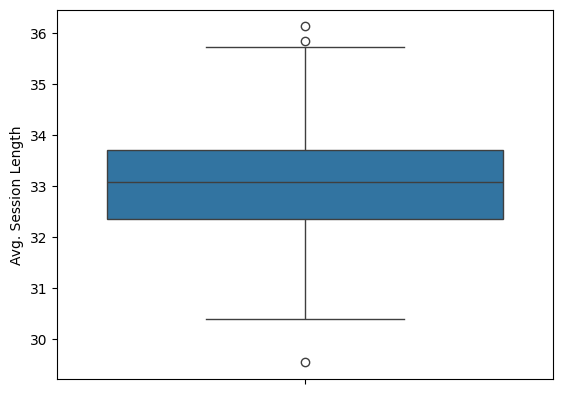

In [ ]:
sns.boxplot(df['Avg. Session Length'])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053613,0.992519,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.046844,0.991243,8.508152,11.388153,11.983231,12.730343,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533497,0.997905,0.269901,2.934588,3.533497,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [ ]:
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [ ]:
upper, lower = outliers(df, "Avg. Session Length")
print("Upper: ", upper)
print("Lower: ", lower)

Upper:  35.76722955875
Lower:  30.286577468749993


In [ ]:
df = df[(df['Avg. Session Length'] > lower) & (df['Avg. Session Length'] < upper)]

<Axes: ylabel='Avg. Session Length'>

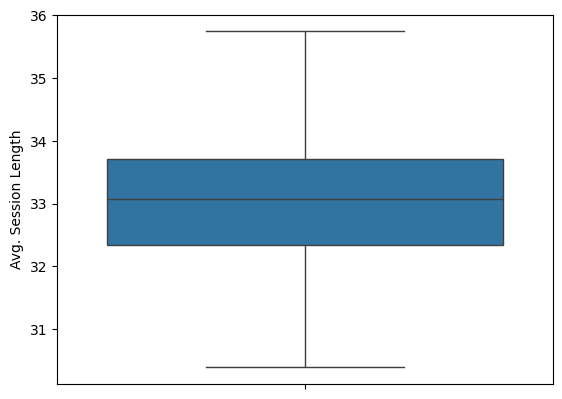

In [ ]:
sns.boxplot(df['Avg. Session Length'])

<Axes: ylabel='Time on App'>

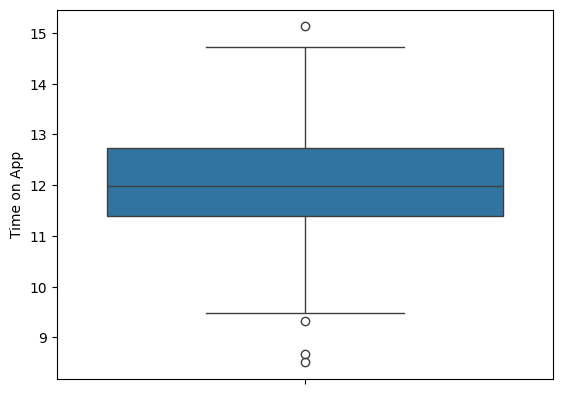

In [ ]:
sns.boxplot(df['Time on App'])

In [ ]:
upper, lower = outliers(df, "Time on App")
print("Upper: ", upper)
print("Lower: ", lower)

Upper:  14.747610045000002
Lower:  9.373214165


In [ ]:
# lihat data yang outlier

# df[df['Time on App'] < lower]
# df[df['Time on App'] > upper]

In [ ]:
df = df[df['Time on App'] > lower]
df = df[df['Time on App'] < upper]

<Axes: ylabel='Time on App'>

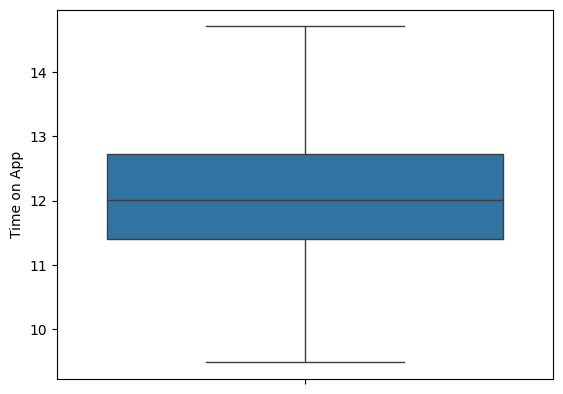

In [ ]:
sns.boxplot(df['Time on App'])

<Axes: ylabel='Time on Website'>

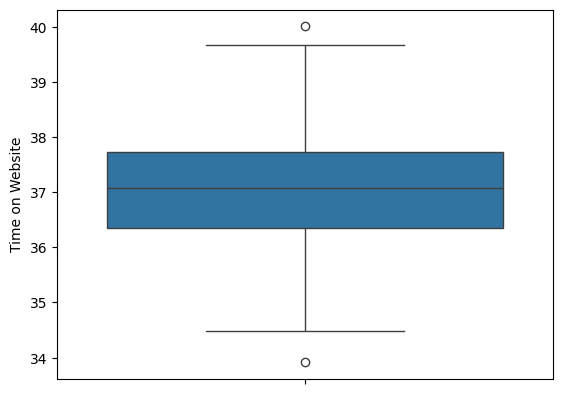

In [ ]:
sns.boxplot(df['Time on Website'])

In [ ]:
upper, lower = outliers(df, "Time on Website")
print("Upper: ", upper)
print("Lower: ", lower)

Upper:  39.777163619999996
Lower:  34.29770626


In [ ]:
df = df[df['Time on Website'] > lower]
df = df[df['Time on Website'] < upper]

<Axes: ylabel='Time on Website'>

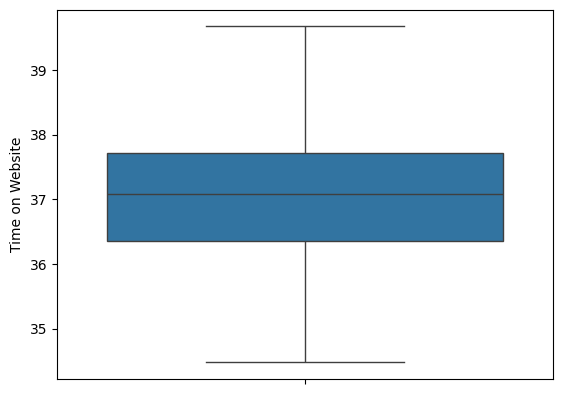

In [ ]:
sns.boxplot(df['Time on Website'])

<Axes: ylabel='Length of Membership'>

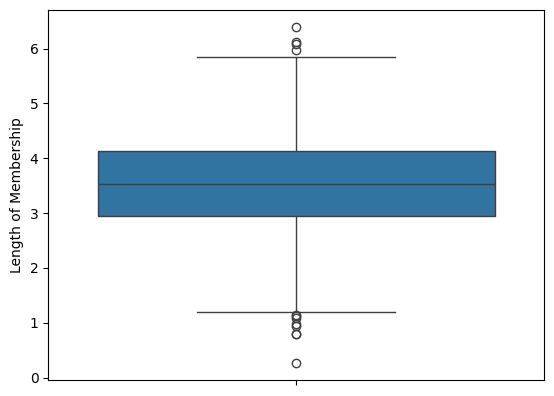

In [ ]:
sns.boxplot(df['Length of Membership'])

In [ ]:
upper, lower = outliers(df, "Length of Membership")
print("Upper: ", upper)
print("Lower: ", lower)

Upper:  5.855553834499999
Lower:  1.2423019105000008


In [ ]:
df = df[df['Length of Membership'] > lower]
df = df[df['Length of Membership'] < upper]

<Axes: ylabel='Length of Membership'>

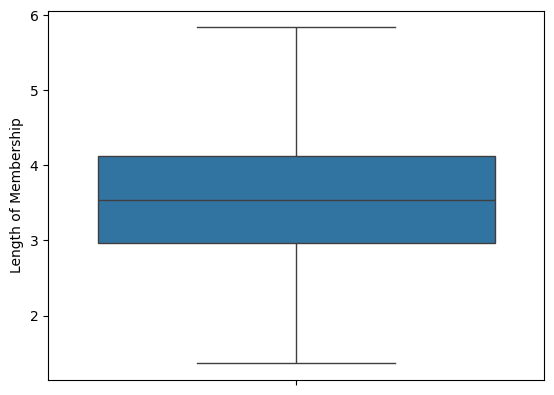

In [ ]:
sns.boxplot(df['Length of Membership'])

In [ ]:
df = df.reset_index(drop=True)


In [ ]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
472,33.237660,13.566160,36.417985,3.746573,573.847438
473,34.702529,11.695736,37.190268,3.576526,529.049004
474,32.646777,11.499409,38.332576,4.958264,551.620146
475,33.322501,12.391423,36.840086,2.336485,456.469510


## Uji Linearitas & Multikolinearitas

In [ ]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.010128,-0.003190,0.040081,0.367351
Time on App,-0.010128,1.000000,0.054783,-0.023484,0.497638
Time on Website,-0.003190,0.054783,1.000000,-0.051268,-0.005154
Length of Membership,0.040081,-0.023484,-0.051268,1.000000,0.770955
Yearly Amount Spent,0.367351,0.497638,-0.005154,0.770955,1.000000


<Axes: >

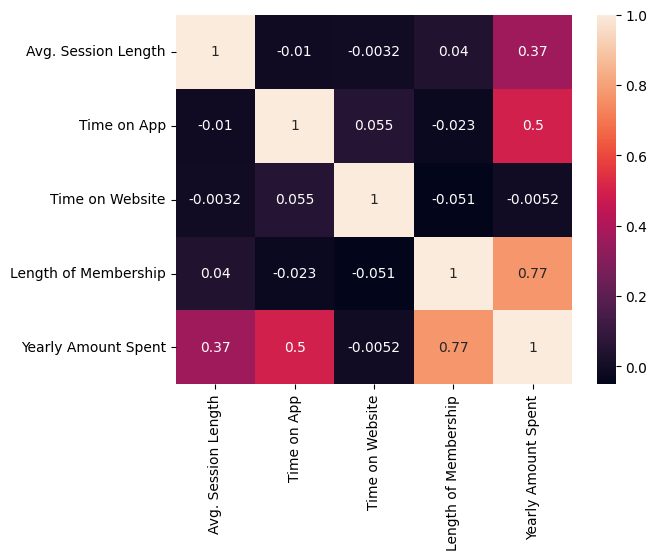

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

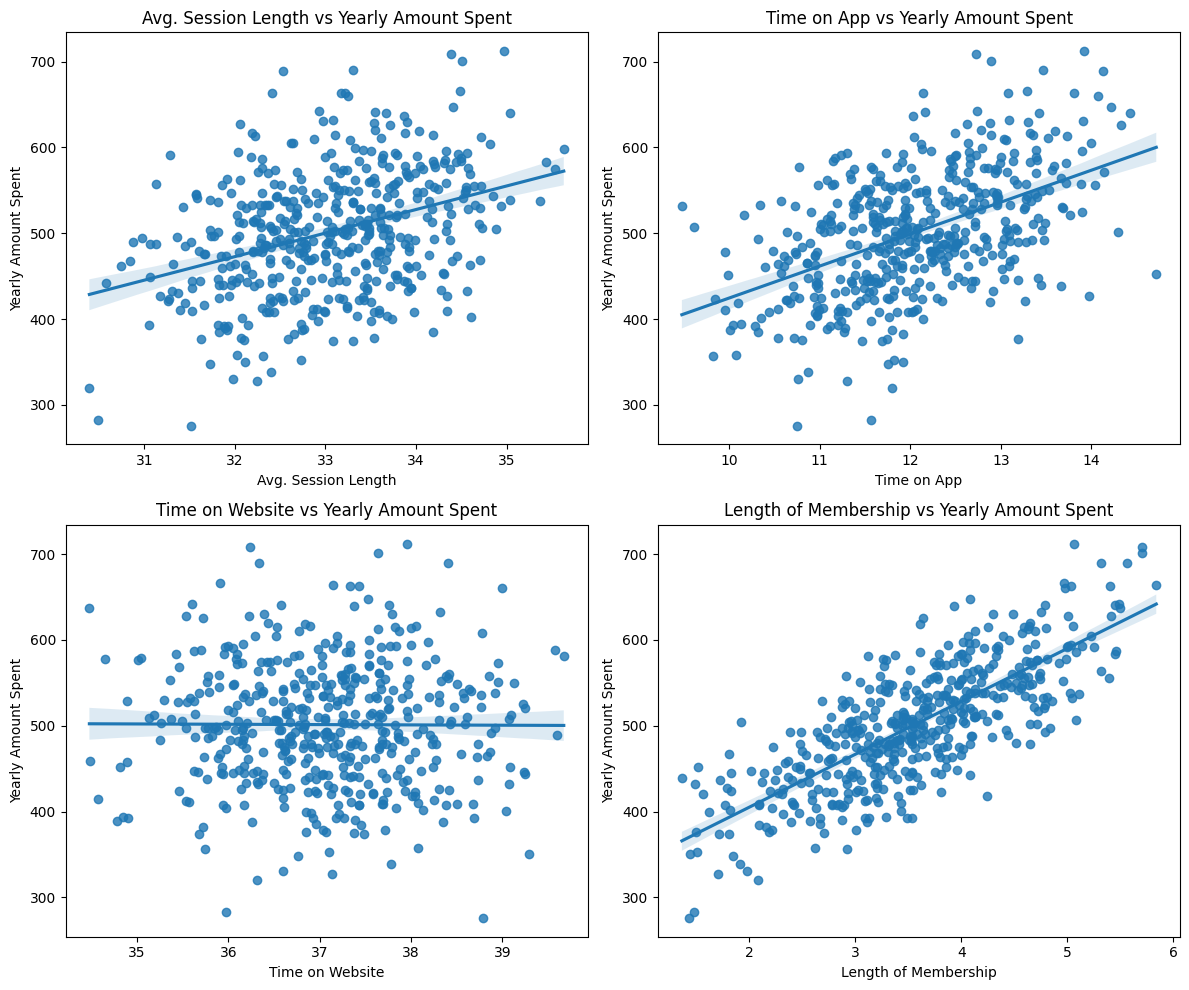

In [ ]:
# Membuat figure dan axes untuk subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 baris, 2 kolom

# Plot pertama
sns.regplot(data=df, x="Avg. Session Length", y="Yearly Amount Spent", ax=axs[0, 0])
axs[0, 0].set_title("Avg. Session Length vs Yearly Amount Spent")

# Plot kedua
sns.regplot(data=df, x="Time on App", y="Yearly Amount Spent", ax=axs[0, 1])
axs[0, 1].set_title("Time on App vs Yearly Amount Spent")

# Plot ketiga
sns.regplot(data=df, x="Time on Website", y="Yearly Amount Spent", ax=axs[1, 0])
axs[1, 0].set_title("Time on Website vs Yearly Amount Spent")

# Plot keempat
sns.regplot(data=df, x="Length of Membership", y="Yearly Amount Spent", ax=axs[1, 1])
axs[1, 1].set_title("Length of Membership vs Yearly Amount Spent")

# Menyesuaikan layout
plt.tight_layout()
plt.show()

## Uji Heteroskedastisitas

In [ ]:
import pandas as pd
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import acorr_ljungbox, het_white
from scipy.stats import kstest, shapiro

In [ ]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']]
y = df['Yearly Amount Spent']

In [ ]:
X = add_constant(X)

In [ ]:
X

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1.0,34.497268,12.655651,39.577668,4.082621
1,1.0,31.926272,11.109461,37.268959,2.664034
2,1.0,33.000915,11.330278,37.110597,4.104543
3,1.0,34.305557,13.717514,36.721283,3.120179
4,1.0,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...,...
472,1.0,33.237660,13.566160,36.417985,3.746573
473,1.0,34.702529,11.695736,37.190268,3.576526
474,1.0,32.646777,11.499409,38.332576,4.958264
475,1.0,33.322501,12.391423,36.840086,2.336485


In [ ]:
model = OLS(y, X)
result = model.fit()
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.977
Model:                             OLS   Adj. R-squared:                  0.977
Method:                  Least Squares   F-statistic:                     5050.
Date:                 Tue, 04 Feb 2025   Prob (F-statistic):               0.00
Time:                         16:46:01   Log-Likelihood:                -1812.2
No. Observations:                  477   AIC:                             3634.
Df Residuals:                      472   BIC:                             3655.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

```
Uji Breusch-Pagan adalah uji statistik yang digunakan untuk mendeteksi
heteroskedastisitas dalam model regresi linear. Heteroskedastisitas terjadi
ketika varians residual tidak konstan di seluruh rentang prediktor,
yang dapat menyebabkan estimasi yang tidak efisien dan kesalahan standar yang
salah, sehingga mempengaruhi keandalan uji hipotesis.
```

In [ ]:
# Uji Asumsi Independen dan Heteroskedastisitas

from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(result.resid, result.model.exog)
print("Breusch-Pagan test p-value:", bp_test[1])

Breusch-Pagan test p-value: 0.3432859028766875


Interpretasi hasil p-value adalah sebagai berikut:

- p-value < 0.05: Menunjukkan adanya heteroskedastisitas.
- p-value >= 0.05: Tidak ada bukti kuat untuk menolak hipotesis nol (homoskedastisitas).

In [ ]:
result.resid

,0
0,-7.002900
1,11.421410
2,-17.833831
3,11.220275
4,7.461458
...,...
472,-2.037737
473,-1.519764
474,-4.443445
475,10.618025


In [ ]:
result.model.exog

array([[ 1.        , 34.49726773, 12.65565115, 39.57766802,  4.08262063],
       [ 1.        , 31.92627203, 11.10946073, 37.26895887,  2.66403418],
       [ 1.        , 33.00091476, 11.33027806, 37.11059744,  4.1045432 ],
       ...,
       [ 1.        , 32.64677668, 11.49940906, 38.33257633,  4.95826447],
       [ 1.        , 33.32250105, 12.39142299, 36.84008573,  2.33648467],
       [ 1.        , 33.71598092, 12.41880832, 35.77101619,  2.73515957]])

<Axes: ylabel='Density'>

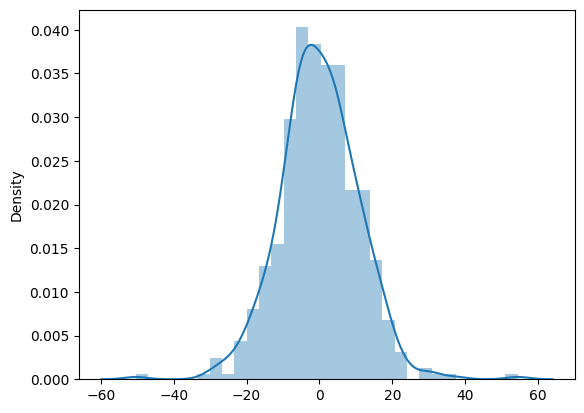

In [ ]:
import seaborn as sns
sns.distplot(result.resid, kde = True)

## Model Building Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']]
y = df['Yearly Amount Spent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(381, 4) (381,) (96, 4) (96,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 'Avg. Session Length', 'Time on App', , 'Time on Website','Length of Membership'

In [ ]:
example = [[100, 1000, 50, 200]]
output = model.predict(example)
output

array([52841.13199287])

In [ ]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
468,34.343922,11.693058,36.812934,3.447093
33,32.820310,11.634893,35.368626,3.533497
131,33.358398,12.703688,36.100914,2.724108
72,33.555207,11.551821,36.628834,2.837943
78,33.501370,13.898082,37.058913,4.130563
...,...,...,...,...
140,33.924625,11.911416,38.274702,2.910038
42,32.893981,11.529878,36.888086,4.643259
248,35.039283,14.426491,37.374184,3.930615
384,33.085298,13.093537,38.315648,4.750360


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([513.10108451, 476.30133283, 482.4125732 , 449.75872348,
       619.50214753, 576.67922204, 610.4808505 , 416.72765273,
       634.07899368, 440.90645748, 477.50429816, 483.40953501,
       455.36926691, 457.4344367 , 485.63199433, 495.49195311,
       459.22988377, 512.51177643, 547.30019113, 609.28086787,
       430.82615122, 519.97426915, 481.13728718, 475.13351084,
       594.76199838, 402.34680344, 513.36938633, 623.47606775,
       417.9368715 , 716.0078134 , 619.86722546, 511.67987031,
       500.55650316, 517.91902084, 459.7830708 , 545.42095712,
       596.29949304, 479.32252109, 494.27711146, 474.67454013,
       531.5968504 , 574.01173622, 500.6198435 , 513.01713965,
       337.35722595, 648.47889904, 601.60174612, 508.93133496,
       529.84838669, 567.1660989 , 458.18508173, 473.82894428,
       447.97191951, 387.62800133, 558.44188361, 458.34997035,
       534.51056778, 451.80573459, 501.78022176, 381.45195194,
       464.84244478, 472.42472998, 553.11788937, 512.49

In [ ]:
y_test

,Yearly Amount Spent
468,510.501479
33,507.441832
131,482.353570
72,444.285908
78,596.430173
...,...
140,460.061277
42,547.244343
248,640.187740
384,632.123588


In [ ]:
from sklearn import linear_model
model = linear_model.Ridge(alpha=.5)

model.fit(X_train, y_train)

# evaluasi

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R Squared Score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 8.19563094871185
Mean Squared Error: 107.96335473485159
R Squared Score is: 0.9800222818625292
